In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import random_unitary
from trasyn import synthesize_qiskit_circuit

In [2]:
U = random_unitary(4)
U

Operator([[-0.1624927 -0.29309387j,  0.15730812-0.51152618j,
            0.58940232-0.32930485j, -0.06011416+0.37661218j],
          [ 0.18770712-0.32108369j, -0.1437499 +0.60233988j,
            0.06640429-0.01783552j,  0.2700966 +0.63286186j],
          [ 0.53157879+0.67699093j,  0.27397456-0.00558376j,
            0.20559412-0.26239966j,  0.24110887+0.1214826j ],
          [ 0.09165383-0.00838197j, -0.50358201-0.0378112j ,
            0.5687842 +0.32372456j,  0.43433053-0.34575819j]],
         input_dims=(2, 2), output_dims=(2, 2))


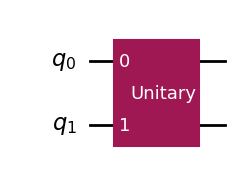

In [3]:
qc = QuantumCircuit(2)
qc.unitary(U, [0, 1])
qc.draw('mpl', filename='u_circuit.png')

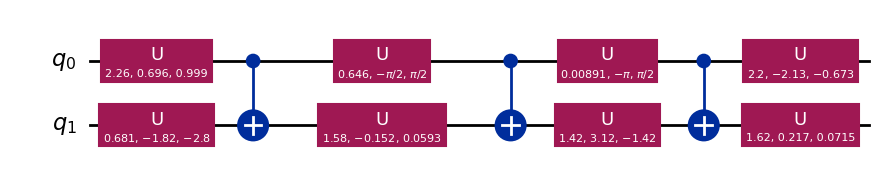

In [4]:
qc_transp = transpile(qc, basis_gates=['u', 'cx'])
qc_transp.global_phase = 0
qc_transp.draw('mpl', filename='u_circuit_transp.png')

/home/iant/miniconda3/envs/quantum/lib/python3.14/site-packages/trasyn/synthesis.py:143: UserWarning: cupy not installed, falling back to numpy.
  warnings.warn("cupy not installed, falling back to numpy.")


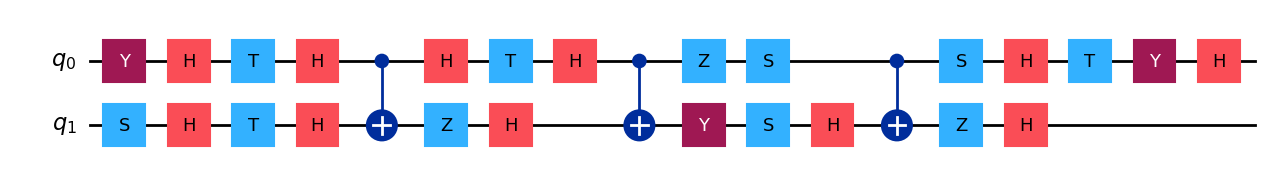

In [5]:
qc_synth = synthesize_qiskit_circuit(qc, nonclifford_budget=1)
qc_synth.draw('mpl', filename='u_circuit_synth.png')

In [15]:
import pyzx as zx
from qiskit import qasm2

In [16]:
zx_circuit = zx.Circuit.from_qasm(qasm2.dumps(qc_synth))
zx_circuit = zx_circuit.to_basic_gates()

In [17]:
zx.draw(zx_circuit)

In [45]:
g = zx_circuit.to_graph()
zx.full_reduce(g)
zx_opt_circuit = zx.extract_circuit(g).to_basic_gates()
zx.draw(zx_opt_circuit)

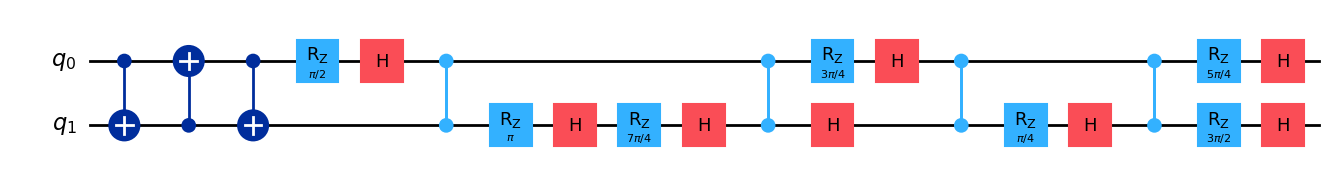

In [46]:
qasm2.loads(zx_opt_circuit.to_qasm(), custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS).draw('mpl')